In [1]:
%run ./common.py

Ce cours a été régénéré le 2018-08-18 00:02:02.731759


# Les scripts

## Le shell

L'interface avec les systèmes d'exploitation a une [longue histoire](http://cristal.inria.fr/~weis/info/commandline.html). Il y a toujours eu une façon d'interagir avec les ordinateurs qui a évolué avec le temps. On peut citer plusieurs grands mouvements, mais globalement :

  * jusqu'à la fin des années 1960, les systèmes de *batch*
  * De 1968 à 1984, c'est l'essor des interfaces avec ligne de commande
  * À partir du milieu des années 80, les interfaces graphiques sortent des laboratoires pour arriver chez les particuliers : interface Mac par Apple en 1984 et Windows 1.0 en 1985.
  * Depuis les années 2010, développement d'interfaces encore en progression: interfaces tactiles, commande vocale, réalité augmentée…

Le shell est un nom générique pour certains types d'interface en ligne de commande. Ils permettent de faire des *scripts*, reproduisant ainsi les fonctionnalités des anciens systèmes de batch, mais aussi un travail interactif. À l'aide d'un langage spécifique, il est possible de contrôler une application dont l'utilité principale est de lancer d'autres applications. Le langage est suffisamment évolué pour permettre de faire des programmes rudimentaires.

Il existe un (et même plusieurs) shell(s) pour les principaux systèmes d'exploitation pour ordinateurs personnels (Windows, Mac, Linux).

Le shell selon les systèmes d'exploitation :

  * Windows (basé sur MSDOS): `command.com`
  * Windows (basé sur NT): `cmd.exe`
  * Windows Vista/XP : Powershell
  * Linux/Mac OS X : `bash` mais aussi `dash`, `posh`, `tcsh` (et aussi ceux du dessous).
  * Anciens UNIX : `sh`, `csh`, `ksh` et très souvent ceux du dessus.
  * Mac OS (≤9) : `Hypercard` pourrait être considéré comme un shell. 

L'idée est que le shell est une coquille autour de l'ordinateur, vu comme le matériel plus le noyau plus les utilitaires de base. L'analogie reste pour les interfaces graphiques, parfois qualifiées en anglais de *graphic shell*.

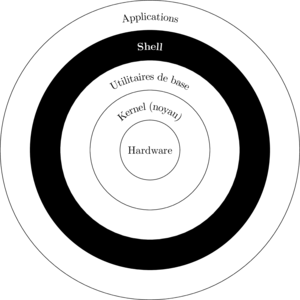

In [2]:
%%tikz -l decorations.text,calc,arrows.meta -s 300,300
\coordinate (O) at (0,0);
\draw (O) circle (5);
\draw[fill=black] (O) circle (4);
\draw[fill=white] (O) circle (3);
\draw (O) circle (2);
\draw (O) circle (1);

\node (O) {Hardware};
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Kernel (noyau)}},decorate] (1.5,0) arc (0:180:1.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Utilitaires de base}},decorate] (2.5,0) arc (0:180:2.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={|\bfseries\color{white}|Shell}},decorate] (3.5,0) arc (0:180:3.5);
\draw[decoration={text along path,raise=-1ex,reverse path,text align={align=center},text={Applications}},decorate] (4.5,0) arc (0:180:4.5);


## Le fonctionnement du shell

Nous allons étudier en particulier le fonctionnement du shell `bash` qui est utilisé comme shell par défaut sous Linux, Mac OS et même d'autres systèmes dérivés d'Unix.

Le shell a deux modes de fonctionnement : 
  * *interactif* où il fonctionne selon le principe d'une boucle REPL (read-eval-print loop)
  * *script* où il lit un fichier d'instructions, et exécute au fur et à mesure les instructions qui lui sont données.

Il n'y a pas, à votre niveau, de différences significative entre les deux modes : à part l'affichage d'un *prompt* lorsque le shell attend des instructions en mode interactif, le langage est le même. Si vous tapez des instructions une à une dans 

> Note : les boucles REPL sont assez fréquentes dans les outils informatiques. C'est le mode de fonctionnement typique des langages interprétés, au nombre desquels on peut compter le shell, Python, PHP, Perl, Prolog, R, Gnuplot, Postscript, etc. D'autres langages peuvent être adaptés à fonctionner en REPL mais ce n'est pas leur fonctionnement par défaut, et souvent accompagné de diminution de leurs possibilités.

Il est possible dans les notebooks Jupyter que vous lisez de faire des scripts shell, mais un certain nombre de choses vont être limitées :

  * Impossibilité de lire le clavier
  * l'affichage se fait dans un terminal pauvre, avec peu de capacités (pas de gras, pas de couleur).
  
Pour ces raisons, il vous est recommandé d'essayer de taper les commandes dans un terminal lorsque vous travaillez en mode interactif. Le terminal est une application qui sert essentiellement à afficher du texte, à lire le clavier et à envoyer ce qui est tapé à une autre application qui tourne _à l'intérieur du terminal_, typiquement, le shell.

Des fois, l'analyse d'une ligne ne suffit pas à savoir comment exécuter : dans ce cas, l'analyse reste "en suspens", et sans rien exécuter, le shell va chercher à avoir une "phrase" correcte avant de faire quelque chose.

C'est l'exemple de la boucle dans ce qui va suivre.

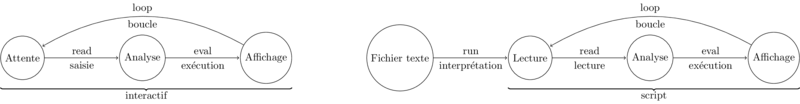

In [3]:
%%tikz -l automata,positioning,decorations.pathreplacing,patterns -s 800,400
\node[node distance=2.5cm,state] (0) {Attente};
\node[node distance=2.5cm,state] (1) [right=of 0] {Analyse};
\node[node distance=2.5cm,state] (2) [right=of 1] {Affichage};

\node[node distance=2.5cm,state] (3) [right=of 2] {Fichier texte};
\node[node distance=2.5cm,state] (4) [right=of 3] {Lecture};
\node[node distance=2.5cm,state] (5) [right=of 4] {Analyse};
\node[node distance=2.5cm,state] (6) [right=of 5] {Affichage};

\path[->,shorten >=1pt]
    (0) edge                node[below] {saisie}    node[above] {read} (1)
    (1) edge                node[below] {exécution} node[above] {eval} (2)
    (2) edge [bend right]   node[below] {boucle}    node[above] {loop} (0)

    (3) edge                node[below] {interprétation} node[above] {run} (4)
    (4) edge                node[below] {lecture}        node[above] {read} (5)
    (5) edge                node[below] {exécution}      node[above] {eval} (6)
    (6) edge [bend right]   node[below] {boucle}         node[above] {loop} (4)
    ;
\draw [thick,decoration={brace,mirror,raise=1cm},decorate] (0.west) -- (2.east)
    node [pos=0.5,anchor=north,yshift=-1cm] {interactif};
\draw [thick,decoration={brace,mirror,raise=1cm},decorate] (4.west) -- (6.east)
    node [pos=0.5,anchor=north,yshift=-1cm] {script};




In [4]:
%%sh
# La première ligne sert à indiquer que le programme n'est pas en python, mais dans un autre langage
# Ici, en shell
# Un petit script, qui montre deux commandes différentes, une boucle, une variable. 
echo "Hello, world!"
echo "-----"
head -n 5 README.md # affiche les cinq premières lignes de README.md
echo "-----"
for i in 1 2 3
do
    echo "$i"
done
echo "J'irai dans les bois."

Hello, world!
-----
# Nouvelle version du cours M1101

Pour installer:

Disposer d'une version de python et de pip3
-----
1
2
3
J'irai dans les bois.


### Syntaxe de base du shell

Une ligne de commande se présente sous la forme de mots séparés par des espaces :

    commande mot1 mot2 mot3

Un mot mis entre guillemets `"comme ça"` est un seul mot, même s'il y a un ou plusieurs espaces au milieu. Pareil pour un mot `'entre apostrophes'`. Mais sinon, les espaces séparent les mots.

Les mots vont servir d'argument à la commande et  sont de divers types :

  * des chaînes de caractères
  * des noms de fichiers
  * des expressions plus complexes
  * des options (qui viennent modifier le sens de la commande) en général introduit par un tiret (ou deux).

Pour pouvoir faire des scripts shells, il va falloir apprendre un certain nombre de commandes basiques. Comme des briques élémentaires, ces commandes pourront ensuite être enchainées pour former de véritables programmes. Pour ce cours, une cinquantaine de commandes devront être connues.

Lorsqu'il y a des options, elles sont généralement mises juste derrière le nom de la commande. Les options peuvent avoir besoin de valeurs pour fonctionner, elles "consomment" alors un argument qui du coup ne sera pas utilisé comme "argument principal".

**Commentaires:** Il est bien sûr possible de faire des commentaires dans un script shell. Un `#` qui n'est pas protégé sera interprété comme le début d'un commentaire qui court jusqu'à la fin de la ligne.

**Caractères spéciaux et protection:** les caractères spéciaux peuvent tous être protégés contre leur interprétation spéciale, et simplement être eux-mêmes. Pour les protéger, il suffit de :

  * mettre un backslash `\` devant, ou
  * mettre l'expression entre apostrophes droites `'...'` (sauf pour l'apostrophe droite, du coup), ou
  * mettre l'expression entre guillemets droits `"..."` (sauf pour dollar, guillemet droit, backslash et backquote).

Comme il n'y a pas de notion de fin de chaîne lorsqu'on arrive sur une apostrophe fermante ou un guillemet fermant mais uniquement de mots, on peut utiliser plusieurs de ces trucs dans le même mot, comme par exemple `echo \#'"'"'"` qui affiche `#"'`

In [5]:
%%sh
echo "Observer les différences entre les différents comportements"
echo "---- -n 12 (une option avec une valeur) ----"
head -n 12 README.md
echo "---- -n 2 -v (deux options dont une avec une valeur) ----"
head -n 2 -v README.md
echo "---- -n2 -v (deux options dont une avec une valeur collée) ----"
head -n2 -v README.md
echo "---- -n 5 -v (deux options et deux arguments) ----"
head -n 5 -v README.md common.py
echo "---- pas d'option  ----"
head README.md
echo "---- fini ----"

Observer les différences entre les différents comportements
---- -n 12 (une option avec une valeur) ----
# Nouvelle version du cours M1101

Pour installer:

Disposer d'une version de python et de pip3

    pip3 install jupyter --user
    pip3 install tutormagic --user
    pip3 install nbtutor --user
    pip3 install matplotlib --user
    pip3 install hide_code --user
    pip3 install git+git://github.com/mkrphys/ipython-tikzmagic.git --user
---- -n 2 -v (deux options dont une avec une valeur) ----
==> README.md <==
# Nouvelle version du cours M1101

---- -n2 -v (deux options dont une avec une valeur collée) ----
==> README.md <==
# Nouvelle version du cours M1101

---- -n 5 -v (deux options et deux arguments) ----
==> README.md <==
# Nouvelle version du cours M1101

Pour installer:

Disposer d'une version de python et de pip3

==> common.py <==
from __future__ import print_function

import math
import random
from IPython.display import display, Markdown, Latex, HTML
---- pas d'option  

### Variables

Pour être suffisamment souple, le shell dispose d'un système de variable. Toutefois, ces variables ne sont que des chaînes de caractères.

Pour donner une valeur à une variable, il suffit d'écrire `NOM=valeur`
La valeur doit être un seul mot (s'il y a des espaces il faut les protéger en les mettant entre guillemets).

Attention : il ne doit par contre pas y avoir d'espaces autour du signe `=`.

Pour utiliser la valeur d'une variable, il suffit d'écrire `$NOM` dans la ligne de commande ou la ligne de script. Si le `$` n'a pas été protégé, `$NOM` sera remplacé par la valeur de la variable.

In [6]:
%%sh

A="Bonjour"
B="le monde!"
echo "$A $B"
C="$A, $B"
echo $C
C="$C — $C"
echo $C

echo "3 mots"
for i in $A $B
do
    echo $i
done
echo "2 mots"
for i in "$A" "$B"
do
    echo $i
done
echo "1 mot"
for i in "$A $B"
do
    echo $i
done


Bonjour le monde!
Bonjour, le monde!
Bonjour, le monde! — Bonjour, le monde!
3 mots
Bonjour
le
monde!
2 mots
Bonjour
le monde!
1 mot
Bonjour le monde!


In [7]:
%%sh
# activité
# Prévoir ce qui va être affiché par les lignes suivantes. Le justifier par le découpage syntaxique

NOM="Han Honyme"
ID=2345
echo "Bonjour $NOM $ID"
echo "Bonjour \"Monsieur\" $NOM #$ID"
echo 'Bonjour $NOM #$ID'
echo Bonjour "$NOM" #$ID
echo Bonjour \$NOM \#\$ID
echo "Bonjour $nom $id"
echo Bonjour "'"$NOM"'" \#$ID
echo Bonjour '\"$NOM\"' "" "" "$ID"

Bonjour Han Honyme 2345
Bonjour "Monsieur" Han Honyme #2345
Bonjour $NOM #$ID
Bonjour Han Honyme
Bonjour $NOM #$ID
Bonjour  
Bonjour 'Han Honyme' #2345
Bonjour \"$NOM\"   2345


In [8]:
interactif = True